In [386]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pandas.api.types as  ptypes
# from google.colab import files
# uploaded = files.upload()
%matplotlib inline

In [387]:
# read file
dataframe = pd.read_csv("weatherHistory.csv")

In [388]:
dataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [389]:
dataframe.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [390]:
dataframe.drop(['Formatted Date', 'Summary','Precip Type','Loud Cover','Daily Summary'], axis=1,inplace=True)
dataframe.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [391]:
dataframe.dtypes

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
dtype: object

In [392]:
dataframe.rename(columns={'Apparent Temperature (C)':'y','Temperature (C)':'x1','Humidity':'x2','Wind Speed (km/h)':'x3','Wind Bearing (degrees)':'x4','Visibility (km)':'x5','Pressure (millibars)':'x6'},inplace=True)
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [393]:
#getting information about features and labels
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
x1    96453 non-null float64
y     96453 non-null float64
x2    96453 non-null float64
x3    96453 non-null float64
x4    96453 non-null float64
x5    96453 non-null float64
x6    96453 non-null float64
dtypes: float64(7)
memory usage: 5.2 MB


In [394]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
y,96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
x2,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
x3,96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
x4,96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
x5,96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
x6,96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [395]:
dataframe.duplicated().sum()

73

In [396]:
dataframe.drop_duplicates(keep=False,inplace=True) 
dataframe.duplicated().sum()

0

In [397]:
def Handling_missing_data(dataset):
   dataset.replace(np.NaN, dataset.mean(), inplace=True)
   return dataset

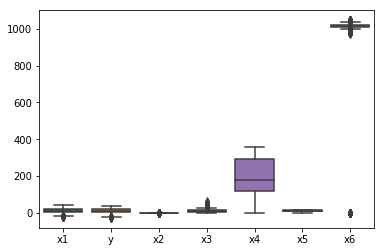

In [398]:
dataframe=Handling_missing_data(dataframe)
sb.boxplot(data=dataframe)

In [399]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,96307.0,11.940113,9.543567,-21.822222,4.727778,12.011111,18.838889,39.905556
y,96307.0,10.861837,10.690224,-27.716667,2.327778,12.011111,18.838889,39.344444
x2,96307.0,0.734727,0.195454,0.000000,0.600000,0.780000,0.890000,1.000000
x3,96307.0,10.819275,6.912023,0.000000,5.844300,9.982000,14.135800,63.852600
x4,96307.0,187.521821,107.359643,0.000000,116.000000,180.000000,290.000000,359.000000
x5,96307.0,10.353050,4.188517,0.000000,8.355900,10.046400,14.812000,16.100000
x6,96307.0,1003.296306,116.699123,0.000000,1011.890000,1016.440000,1021.090000,1046.380000


In [400]:
dataframe = dataframe.dropna()

In [401]:
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [402]:
dataframe.shape

(96307, 7)

In [403]:
# seperating output data and parameters from dataframe
def seperate_data(dataframe):
    output = dataframe.y
    return dataframe.drop('y',axis=1), output 

In [404]:
# removing outliers from dataframe
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if ptypes.is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [405]:
dataframe = remove_outlier(dataframe)

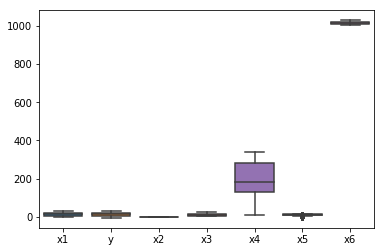

In [406]:
# plotting after removing outliers
sb.boxplot(data = dataframe)

Skewness is -0.34958513597240687


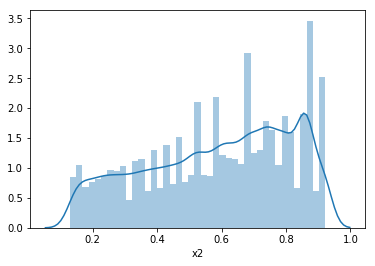

In [407]:
# now transforming feature variable
target = (np.square((dataframe.x2)))
print ('Skewness is', target.skew())
sb.distplot(target)

In [408]:
print(target.mean(), target.median())
dataframe['x2'] = target

0.5865781177419046 0.6241000000000001


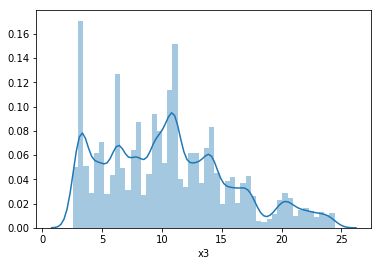

In [409]:
sb.distplot(dataframe['x3'])

In [410]:
# split dataset into train data and test data
def split_data(dataframe):
#         calculate train dataset percentage for train model
        train_per = 0.70*len(dataframe)
        train_per = int(train_per)
#         calculate test dataset percentage for test train model         
        test_per = len(dataframe)-train_per
#         getting trained data from dataset
        X_train_set = dataframe.head(train_per)
#         getting test data for testing train model
        Y_train_set = dataframe.tail(test_per)
        return X_train_set,Y_train_set

In [411]:
dataframe.shape

(52097, 7)

In [412]:
# feature scaling on dataframe
def feature_scaling(dataset):
    for name in dataset.columns:
        dataset[name] = (dataset[name] - dataset[name].min()) / (dataset[name].max()-dataset[name].min())
    return dataset

In [413]:
dataframe = feature_scaling(dataframe)

In [414]:
dataframe.head()

,x1,y,x2,x3,x4,x5,x6
0,0.400364,0.395353,0.836490,0.527982,0.729483,0.981777,0.441809
1,0.396542,0.390607,0.770202,0.534610,0.753799,0.981777,0.460341
2,0.397270,0.453936,0.836490,0.061856,0.586626,0.920273,0.471831
3,0.361601,0.352806,0.706187,0.527246,0.784195,0.981777,0.489251
4,0.376888,0.383243,0.706187,0.387334,0.753799,0.981777,0.492958


In [415]:
dataframe.shape

(52097, 7)

In [416]:
train,test = split_data(dataframe)
train_data =  train
test_data = test

In [417]:
train_data.shape

(36467, 7)

In [418]:
test_data.shape

(15630, 7)

In [ ]:
x_train_data = np.array(dataframe)
y_train_data = np.array(test_data)

In [419]:
class MultiLinearRegression():
    ncols = 6
    def gradient_descent(self,learning_rate,weight,bais,epoch,dataframe,output):
#      def Gradient_Descent(self, train_x_data, train_y_data,theta_vector):
        lists=[]
        ncols=6
        for length in range(self.epoch):
            hypo=np.dot(theta_vector.T,train_x_data.T)
            if hypo.any()==np.nan:
                print("sfhkje",length)
#             print(hypo)
            cf=(np.dot(np.subtract(hypo,train_y_data),train_x_data))
        print(cf.shape)
#             print(cf)
        theta_vector=np.subtract(theta_vector.T,np.divide((np.dot(self.alpha,cf)),len(train_x_data)))
        print(theta_vector.shape)
        print(theta_vector)
        return theta_vector
#             theta0 = theta0 - ((self.alpha * h1) / len(train_x_data))
#             theta1 = theta1 - ((self.alpha * h2) / len(train_x_data))
#             value=theta0
#             lists.append(value)
           
#         return [theta0, theta1],lists

   def Test_data(self, test_x_data, theta_vector):
        print(test_x_data.shape,theta_vector.shape)
       
        y_predict = np.dot(theta_vector,test_x_data.T)
        print(y_predict)
        return y_predict

    def accuracy(self, y_test_data, y_predicted):
        y_test_data = np.divide(abs(np.subtract(y_predicted,y_test_data)),y_test_data)
        data_accuracy = abs(np.sum(y_test_data)/len(y_test_data))
        return (data_accuracy)*100


In [428]:
# def main(dataframe,test_data):
    
#     learning_rate = 0.01
#     ncols = 6
#     weight = np.full(ncols,0.5)
#     bais = 0.5
#     epoch = 100
    
#     x_train_data = np.array(dataframe)
#     y_train_data = np.array(test_data)
# #     seperating x and y columns
  
#     x_train_data,train_output = seperate_data(x_train_data)
#     x_test_data,test_output = seperate_data(y_train_data)
    
    
#     obj = MultiLinearRegression()
# #     calculating theta 0 and theta 1 using gradient and descent
#     weight,bais = obj.gradient_descent(learning_rate,weight,bais,epoch,x_train_data,output)
#     print(weight,bais)
#     test_data = (test_data[test_data['y']!=0]).reset_index()
# #     seperating test data
#     test_data,output = seperate_data(test_data)
    
# #         test data over train data 
#     y_prediction_test =obj.test(test_data,weight,bais)
    
# #         get accuracy of predicted value to original value
#     accuracy = obj.accuracy(y_prediction_test,output)

#     print("Accuracy:",accuracy)

    
def main():
    obj = MultiLinear_Regression()
    # calling method by class object
    list1 = []

    x_train_data = np.array(train_data_x)
    y_train_data = np.array(train_data_y)

    x_test_data = np.array(test_data_x)
    print(x_test_data)
    y_test_data = np.array(test_data_y)
    #     print(x_test_data)

    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))

    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))

    print("test x",x_test_data)
    x_size = 6
    theta_vector = np.ones(((x_size + 1), 1), dtype='f')

    print(theta_vector.shape)
    print(x_train_data.shape)


    theta_vector = obj.Gradient_Descent(x_train_data, y_train_data,theta_vector)
    #     print(theta_vector)
    y_predict = obj.Test_data(x_test_data, theta_vector)
    print("y predict",y_predict)
    acc = obj.accuracy(y_test_data, y_predict)
    print("accuracy is", acc)

if __name__ == '__main__':
    main()

NameError: name 'MultiLinear_Regression' is not defined

In [429]:
# # main(dataframe,test_data)
# main(dataframe,test_data)